In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [6]:
data =pd.read_csv('/Users/gup9905/Desktop/Default.csv')

In [7]:
data.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [9]:
data.shape

(10000, 4)

In [10]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


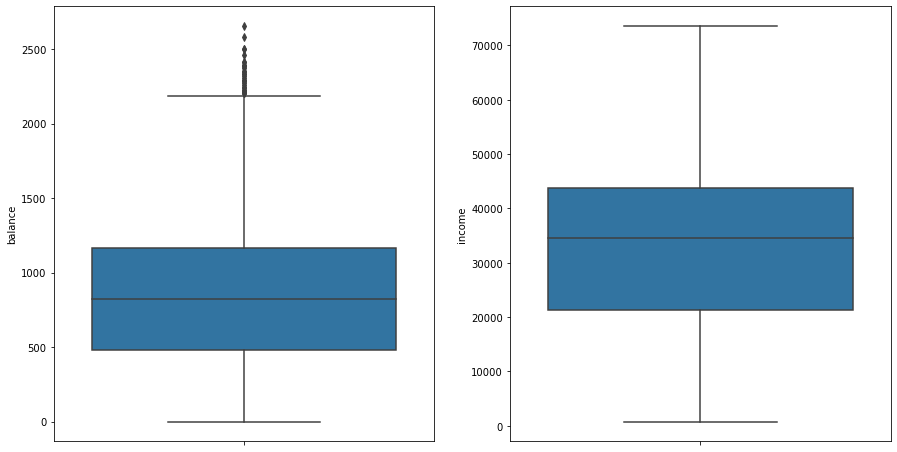

In [20]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.boxplot(y = data['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = data['income'])
plt.show()

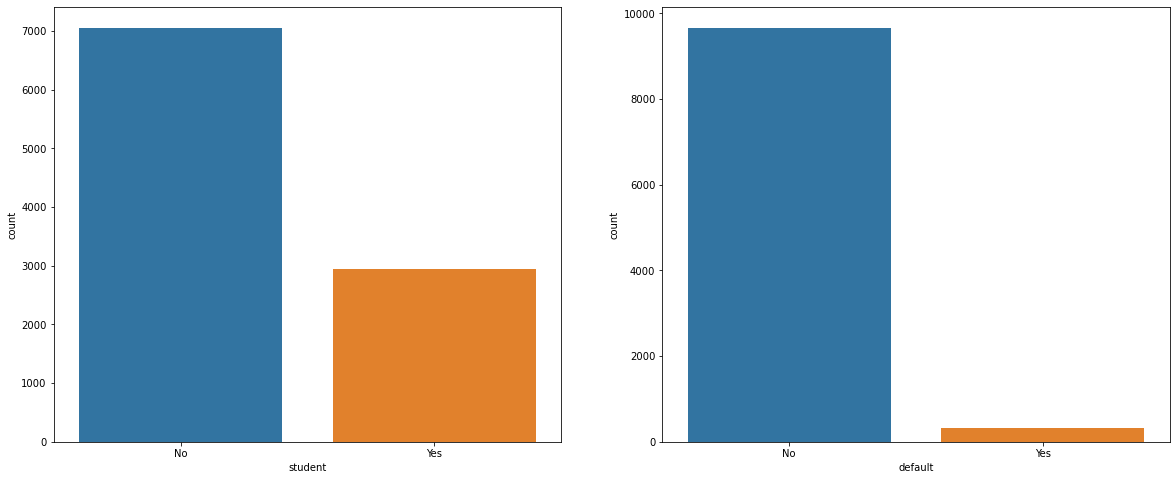

In [19]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data['student'])

plt.subplot(1,2,2)
sns.countplot(data['default'])
plt.show()

In [21]:
data["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [22]:
data["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [24]:
data["student"].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

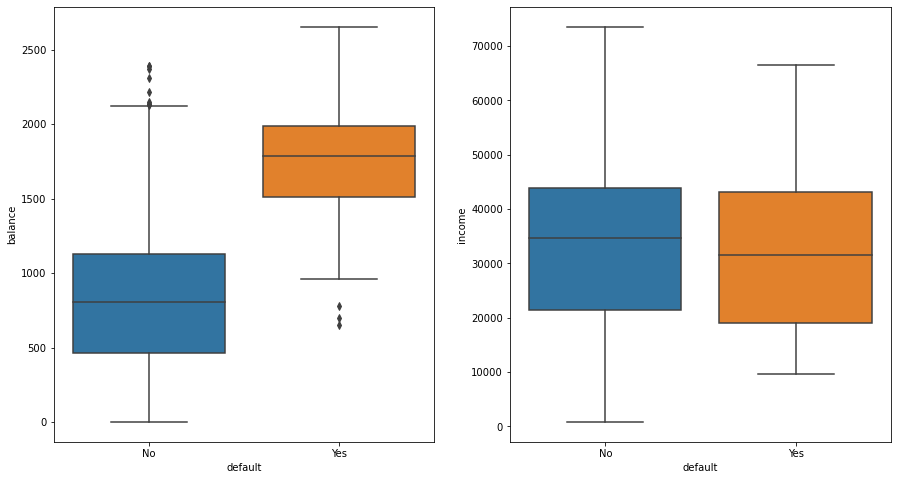

In [27]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['balance'])

plt.subplot(1,2,2)
sns.boxplot(data['default'], data['income'])
plt.show()

In [28]:
pd.crosstab(data['student'], data['default'], normalize ='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


In [33]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [37]:
A1, A3 = data['balance'].quantile([.25,.75])
IQR = A3 - A1
LL = A1 - 1.5*(IQR)
UL = A3 + 1.5*(IQR)

In [38]:
fd = data[data['balance'] > UL]

In [39]:
fd['default'].count()

31

In [41]:
fd['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [45]:
data['balance'] = np.where(data['balance'] > UL, UL, data['balance'])

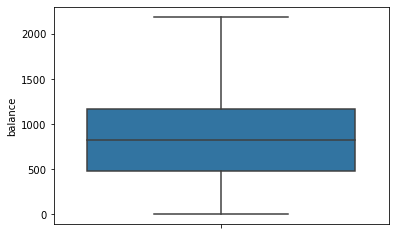

In [47]:
sns.boxplot(y = data['balance'])
plt.show()